## **I. Quantum Random Generation steps**

1. We start with a qubit in the state 0 and apply a Hadamard gate on it to create a superposition in which the probabilities for 0 and 1 are the same.
2. Then we measure the qubit and save the output
3. By measuring the qubit, we'll get an output that's either 0 or 1, in other words, we'll obtain a random bit. So we only need to call this gate n times to get n random bits.

## **II. Implementing the ideas**

In [2]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.1 MB/s 
     |████████████████████████████████| 19.2 MB 5.5 MB/s 
     |████████████████████████████████| 240 kB 62.6 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 112 kB 60.5 MB/s 
     |████████████████████████████████| 943 kB 62.0 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 4.0 MB 45.2 MB/s 
     |████████████████████████████████| 1.9 MB 44.8 MB/s 
     |████████████████████████████████| 112 kB 59.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=7819443f5b9521223e2da6e85fe5cc4c888602c47679480b636e1f9825843f18
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/25714

In [11]:
from qiskit import *
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

In [30]:
def bitstring_quantum_generator(qc, bit_number, backend):

    bitstring = ""

    for item in range(bit_number):
        counts = execute(qc, backend, shots=1).result().get_counts()
        bit = list(counts.keys())[0]  # one key because shots=1
        bitstring += bit

    return (bitstring, counts)


backend = Aer.get_backend('qasm_simulator')
bitstring, counts = bitstring_quantum_generator(qc, 100, backend)
print(bitstring)

1000001010100011110101110001110000111101010110111110110101010100000100011000001011001110101000001101


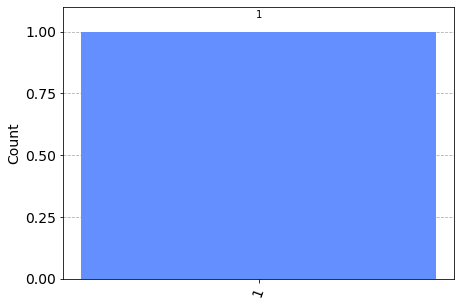

In [31]:
plot_histogram(counts)

## **Execting on a fake noisy backend**

In [14]:
from qiskit.providers.fake_provider import FakeManila
from qiskit.visualization import plot_histogram

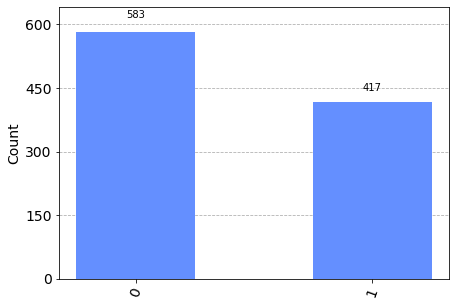

In [32]:
backend = FakeManila()
results = backend.run(transpile(qc, backend), shots = 1000).result()
counts = results.get_counts()
plot_histogram(counts)

We got some errors due to the applied measurement and quantum noise. 

Let’s compare how they look against what we saw with the simulator.

The difference is that in a simulated case, we only got only 1. However, when the code was run on a real quantum device, we also had a small number of results showing up in 0 and 1.

**Why did that happen?**

The difference between the simulated case and the code that was run on the real quantum device is that the simulator simulates a perfect quantum device.

In the meantime, the real quantum device is susceptible to small quantum errors (quantum computers are very sensible to noise) which are getting improved everyday as a result of the technology improving.

So we expect to see these counts getting lower and lower and the results getting closer to the ideal simulations.

## **Quantum error correction**

Propositions
1. Augment number of shots

# **Executing on IBMQ real device**

In [20]:
from qiskit import IBMQ

In [22]:
IBMQ.save_account('dcba64487e24956b59135c56b00a47fd5637bc9019eea775a316d0167a18f9c5c6fbfdac9c9f7bf7b4e9caabf18ffb1730bebd9b28a7c060a353f1495b542761')

In [23]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
provider = IBMQ.get_provider('ibm-q')

In [25]:
qcomp = provider.get_backend('ibmq_belem')

In [34]:
job = execute(qc, backend = qcomp)

In [28]:
from qiskit.tools.monitor import job_monitor

In [35]:
job_monitor(job)

Job Status: job has successfully run


In [36]:
result = job.result()

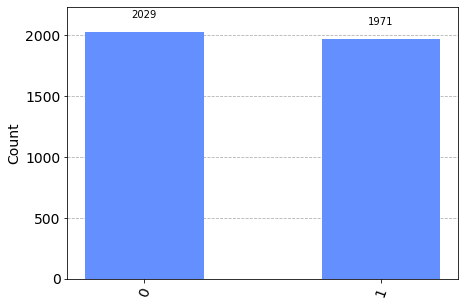

In [38]:
plot_histogram(result.get_counts(qc))

# **References**

https://quantumtech.blog/2022/09/08/quantum-computing-noise/

https://learn.microsoft.com/en-us/azure/quantum/tutorial-qdk-quantum-random-number-generator?tabs=tabid-qsharp